# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
header = soup.find_all('th') #find_all result is a list

header_list = [x.text.strip() for x in header]

header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
info_list = [
    [cell.text for cell in row.find_all('td')] 
    for row in soup.find_all('tr', class_="data-row")]

In [8]:
info = soup.find_all('tr', class_="data-row")

# Create an empty list
info_list = []
# Loop through the scraped data to create a list of rows
for row in info:
    info_loop = [] 
    row_data = row.find_all('td')
    for cell in row_data: 
        info_loop.append(cell.text)
    info_list.append(info_loop)

info_list    

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [9]:
soup.find_all('tr', class_='data-row')

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [10]:
# Extract all rows of data
table = soup.find('table', class_= 'table')

table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
list=[]
# Loop through the scraped data to create a list of rows
for row in table:
    info = table.find_all('td')
    list.append(info)
list

[[<td>2</td>,
  <td>2012-08-16</td>,
  <td>10</td>,
  <td>155</td>,
  <td>6</td>,
  <td>-75.0</td>,
  <td>739.0</td>,
  <td>13</td>,
  <td>2012-08-17</td>,
  <td>11</td>,
  <td>156</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>740.0</td>,
  <td>24</td>,
  <td>2012-08-18</td>,
  <td>12</td>,
  <td>156</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>741.0</td>,
  <td>35</td>,
  <td>2012-08-19</td>,
  <td>13</td>,
  <td>157</td>,
  <td>6</td>,
  <td>-74.0</td>,
  <td>732.0</td>,
  <td>46</td>,
  <td>2012-08-20</td>,
  <td>14</td>,
  <td>157</td>,
  <td>6</td>,
  <td>-74.0</td>,
  <td>740.0</td>,
  <td>57</td>,
  <td>2012-08-21</td>,
  <td>15</td>,
  <td>158</td>,
  <td>6</td>,
  <td>-78.0</td>,
  <td>740.0</td>,
  <td>68</td>,
  <td>2012-08-22</td>,
  <td>16</td>,
  <td>158</td>,
  <td>6</td>,
  <td>-77.0</td>,
  <td>740.0</td>,
  <td>79</td>,
  <td>2012-08-23</td>,
  <td>17</td>,
  <td>159</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>742.0</td>,
  <td>112</td>,
  <td>2012-08-27</td>,
  <td>21</

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(info_list, columns=header_list)

In [13]:
# Confirm DataFrame was created successfully
df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
df['id'] = df['id'].astype('int')
df['sol'] = df['sol'].astype('int')
df['ls'] = df['ls'].astype('int')
df['month'] = df['month'].astype('int')
df['min_temp'] = df['min_temp'].astype('float')
df['pressure'] = df['pressure'].astype('float')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [16]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?
months = df['month'].max()

print(f"There are {months} months on Mars.")

There are 12 months on Mars.


In [18]:
# 2. How many sols (Martian days) worth of data are there?
sols = len(df)

print(f"There are {sols} sols of data")

There are 1867 sols of data


In [19]:
# 3. What is the average minimum temperature by month?
month_groupby = df.groupby(['month'])
low_temp_avg = month_groupby['min_temp'].mean()

low_temp_avg


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

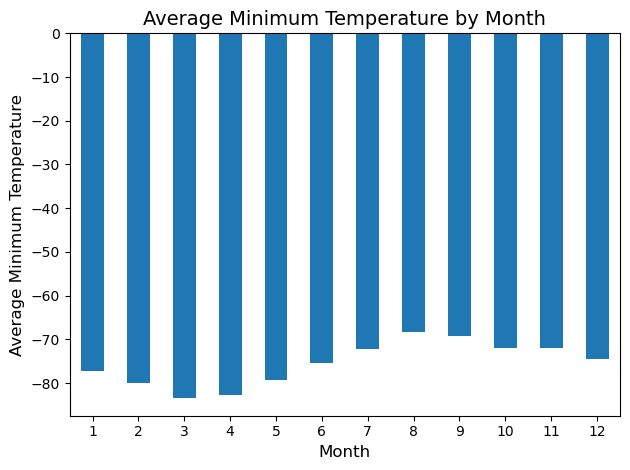

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the average minimum temperature by month

# Create the bar plot
low_temp_avg.plot(kind='bar')
plt.title('Average Minimum Temperature by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.savefig('avg_min_temp.png')

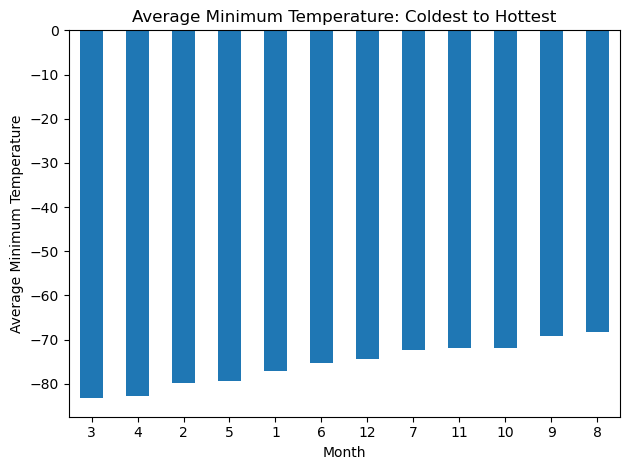

<Figure size 640x480 with 0 Axes>

In [21]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the average minimum temperatures
coldest_to_hottest = low_temp_avg.sort_values()
hottest_to_coldest = low_temp_avg.sort_values(ascending=False)

# Create a bar plot of sorted temperatures
coldest_to_hottest.plot(kind='bar')
plt.title('Average Minimum Temperature: Coldest to Hottest')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.savefig('avg_min_temp_sorted.png')

In [22]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby(['month'])['pressure'].mean()

avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

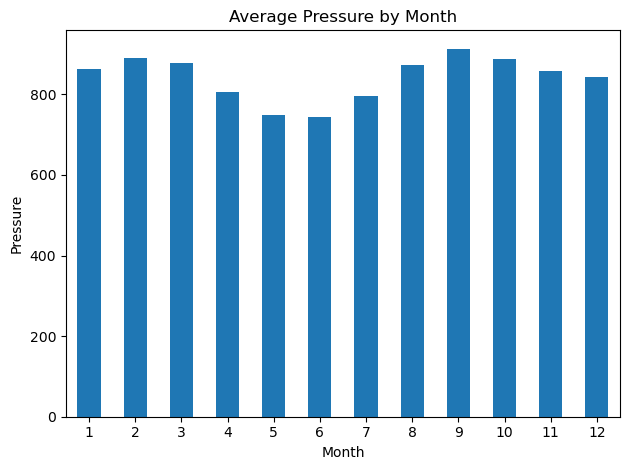

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', 
                    title='Average Pressure by Month', 
                    ylabel='Pressure',
                    xlabel='Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.savefig('avg_pressure.png')

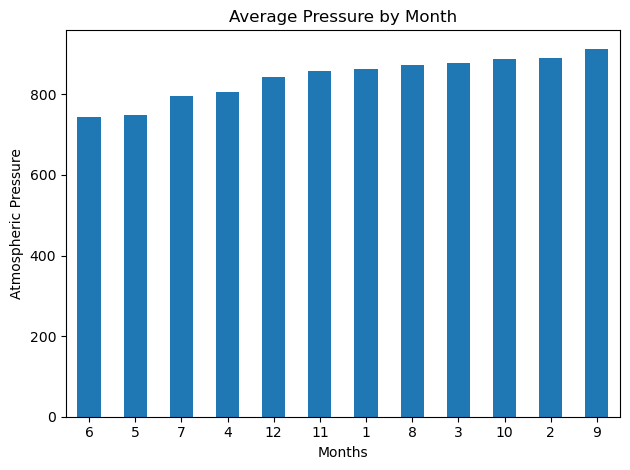

<Figure size 640x480 with 0 Axes>

In [24]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
low_pressure = avg_pressure.sort_values(ascending=True)

high_pressure = avg_pressure.sort_values(ascending=False)

low_pressure.plot(kind='bar',
                  title='Average Pressure by Month',
                  ylabel='Atmospheric Pressure',
                  xlabel='Months')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()
plt.savefig('avg_pressure_sorted.png')

In [25]:
import datetime

In [26]:
for index, row in df.iterrows():
    if 

SyntaxError: invalid syntax (1617568041.py, line 2)

In [69]:
df['ls'].max()

359

In [74]:
df['ls']

0       155
1       156
2       156
3       157
4       157
       ... 
1862    133
1863    134
1864    134
1865    135
1866    135
Name: ls, Length: 1867, dtype: int32

In [55]:
date_0 = '2013-08-01'
date_359 = '2015-06-17'

# Convert to datetime objects
date_0_val = datetime.datetime.strptime(date_0, "%Y-%m-%d")
date_359_val = datetime.datetime.strptime(date_359, "%Y-%m-%d")

# Calculate difference
mars_year_days = date_359_val - date_0_val
print(f"One Mars year is {mars_year_days} Earth Days")

One Mars year is 685 days, 0:00:00 Earth Days


one Martian year is around 685 terrestial days


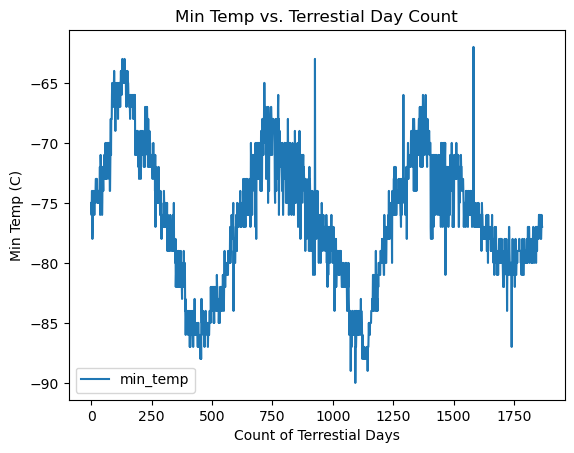

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Reset the index of mars_weather_df
df = df.reset_index()

# Create a plot that looks at min_temp and the count of terrestial_date (the day count is in the index)
df.plot.line(x='index', y='min_temp')
plt.title('Min Temp vs. Terrestial Day Count') 
plt.xlabel('Count of Terrestial Days') 
plt.ylabel('Min Temp (C)')
# Display the results
print(f'one Martian year is around 685 terrestial days')

# Save the plot as a image file
plt.savefig('min_temp_vs_day_count.png')

#### Minimum Temperature

Month with lowest temperature: Month 3

Month with highest temperature: Month 8


#### Atmospheric Pressure

Month with lowest atmospheric pressure:     Month 6

Month with highest atmospheric pressure:    Month 9

#### Year Length
One martian year is about 685 days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False)

In [27]:
browser.quit()